# Reber Grammar Visualization
... do some nice visualization stuff

Import keras and plotting libraries

In [1]:
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import reber_utility as ru

Using Theano backend.


load data and model:

In [2]:
model = load_model('embedCerg_model_2.h5')
train_metrics = np.load('embedTrainMetrics_2.npy')
test_metrics = np.load('embedTestMetrics_2.npy')
X = np.load('embedXdata_2.npy')
m = ru.generate_reber_machine_discrete()

create predictions:

In [3]:
input_shape = (model.get_layer(index=0)).input_shape

xPredictBatch = X[-input_shape[0]:,:input_shape[1]]
P = model.predict(xPredictBatch, batch_size = input_shape[0])

P = P.transpose(0,2,1)

plot predictions:

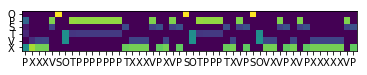

In [4]:
imgplot = plt.imshow(P[0])
plt.yticks(np.arange(P[0].shape[0]), list(m.index2trans.values()))
plt.xticks(np.arange(P[0].shape[1]), [m.index2trans[np.argmax(i)] for i in xPredictBatch[0]])
plt.show()

plot metrics:

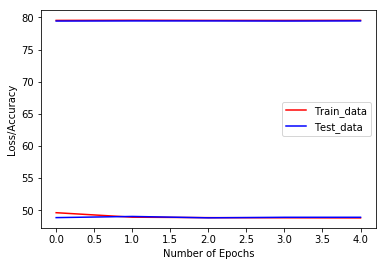

In [5]:
x = range(train_metrics.shape[0])

plt.plot(x, train_metrics[:,0]/10, 'red')
plt.plot(x, test_metrics[:,0]/2, 'blue')

plt.plot(x, train_metrics[:,1]/10, 'red')
plt.plot(x, test_metrics[:,1]/2, 'blue')

plt.legend(['Train_data', 'Test_data'])
plt.ylabel('Loss/Accuracy')
plt.xlabel('Number of Epochs')
plt.show()